In [1]:
import _init_paths
import consts.dir_consts as drc
from src.circle_task.train_actor_critic import get_network

import nengo
import matplotlib.pyplot as plt
import pickle

RES_DIR = drc.RESULTS_DIR+"/circle_task/"

2022-05-06 21:25:37.903550: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-06 21:25:37.903696: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gra395): /proc/driver/nvidia/version does not exist


# Run the Agent

In [35]:
net = get_network()
sim = nengo.Simulator(net)
sim.run(100) # Execute for 100 secs first.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

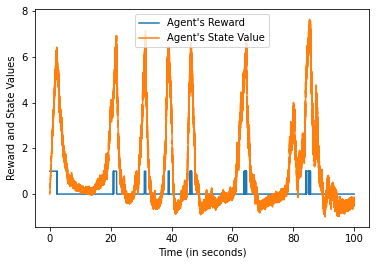

In [36]:
plt.plot(sim.trange(), sim.data[net.probe_reward], label="Agent's Reward")
plt.plot(sim.trange(), sim.data[net.probe_value], label="Agent's State Value")
plt.xlabel("Time (in seconds)")
plt.ylabel("Reward and State Values")
plt.legend()

In [22]:
# Run the Actor-Critic model for next 300 secs.
sim.run(300) # Execute for 300 seconds.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

KeyboardInterrupt: 

In [5]:
print("Saving Results...")
pickle.dump(sim.data[net.probe_value],
            open(drc.RESULTS_DIR+"/circle_task/full_critic_value.p", "wb"))
pickle.dump(sim.data[net.probe_reward],
            open(drc.RESULTS_DIR+"/circle_task/full_env_rewards.p", "wb"))
pickle.dump(sim.data[net.probe_actor_choice],
            open(drc.RESULTS_DIR+"/circle_task/full_actor_choices.p", "wb"))
pickle.dump(sim.data[net.probe_actor_aprobs],
            open(drc.RESULTS_DIR+"/circle_task/full_actor_action_probs.p", "wb"))
pickle.dump(sim.trange(),
            open(drc.RESULTS_DIR+"/circle_task/sim_trange.p", "wb"))
print("Results saved! Exiting...")

Saving Results...
Results saved! Exiting...


In [15]:
actor_action_probs = pickle.load(open(RES_DIR+"./full_actor_action_probs.p", "rb"))
actor_action_choices = pickle.load(open(RES_DIR+"./full_actor_choices.p", "rb"))
critic_value = pickle.load(open(RES_DIR+"./full_critic_value.p", "rb"))
env_rewards = pickle.load(open(RES_DIR+"./full_env_rewards.p", "rb"))
sim_trange = pickle.load(open(RES_DIR+"./sim_trange.p", "rb"))

# Agent's Reward

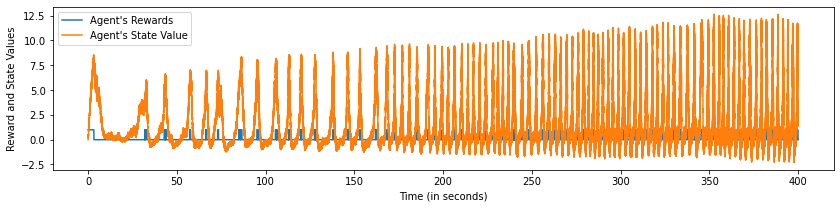

In [16]:
plt.figure(figsize=(14, 3))
plt.plot(sim_trange, env_rewards, label="Agent's Rewards")
plt.plot(sim_trange, critic_value, label="Agent's State Value")
plt.xlabel("Time (in seconds)")
plt.ylabel("Reward and State Values")
plt.legend()

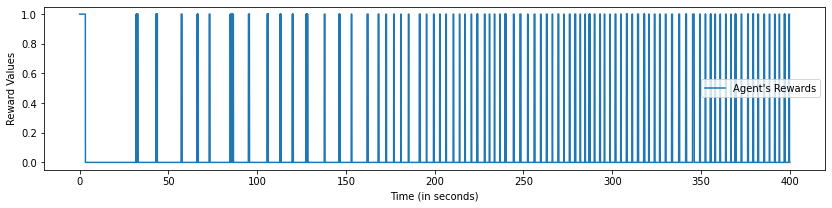

In [17]:
plt.figure(figsize=(14, 3))
plt.plot(sim_trange, env_rewards, label="Agent's Rewards")
plt.xlabel("Time (in seconds)")
plt.ylabel("Reward Values")
plt.legend()

# Agent's Action Choices

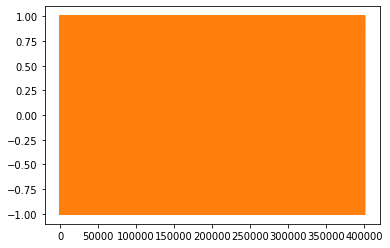

In [11]:
plt.plot(actor_action_choices)

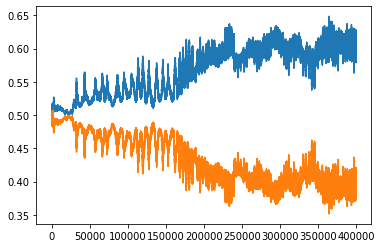

In [12]:
plt.plot(actor_action_probs)